Fuel consumption dataset, FuelConsumption.csv, contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale.

MODEL YEAR
MAKE
MODEL
VEHICLE CLASS
ENGINE SIZE
CYLINDERS
TRANSMISSION
FUEL CONSUMPTION in CITY(L/100 km)
FUEL CONSUMPTION in HWY (L/100 km)
FUEL CONSUMPTION COMB (L/100 km)
CO2 EMISSIONS (g/km)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

In [3]:
df = pd.read_csv('Fuel_Consumption.csv')

In [4]:
##take a look at the dataset
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
##summarize the data

df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [6]:
cdf=df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'EMISSIONS']]
cdf.head(9)

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,EMISSIONS
0,1.6,4,9.2,186
1,1.6,4,8.5,175
2,3.2,6,12.2,230
3,3.5,6,13.4,264
4,1.8,4,10.0,198
5,1.8,4,9.3,189
6,1.8,4,9.4,191
7,3.0,6,13.6,267
8,3.2,6,13.8,269


**Visualization Of Data**
Now let's do a visualization of the data to see the correlation.

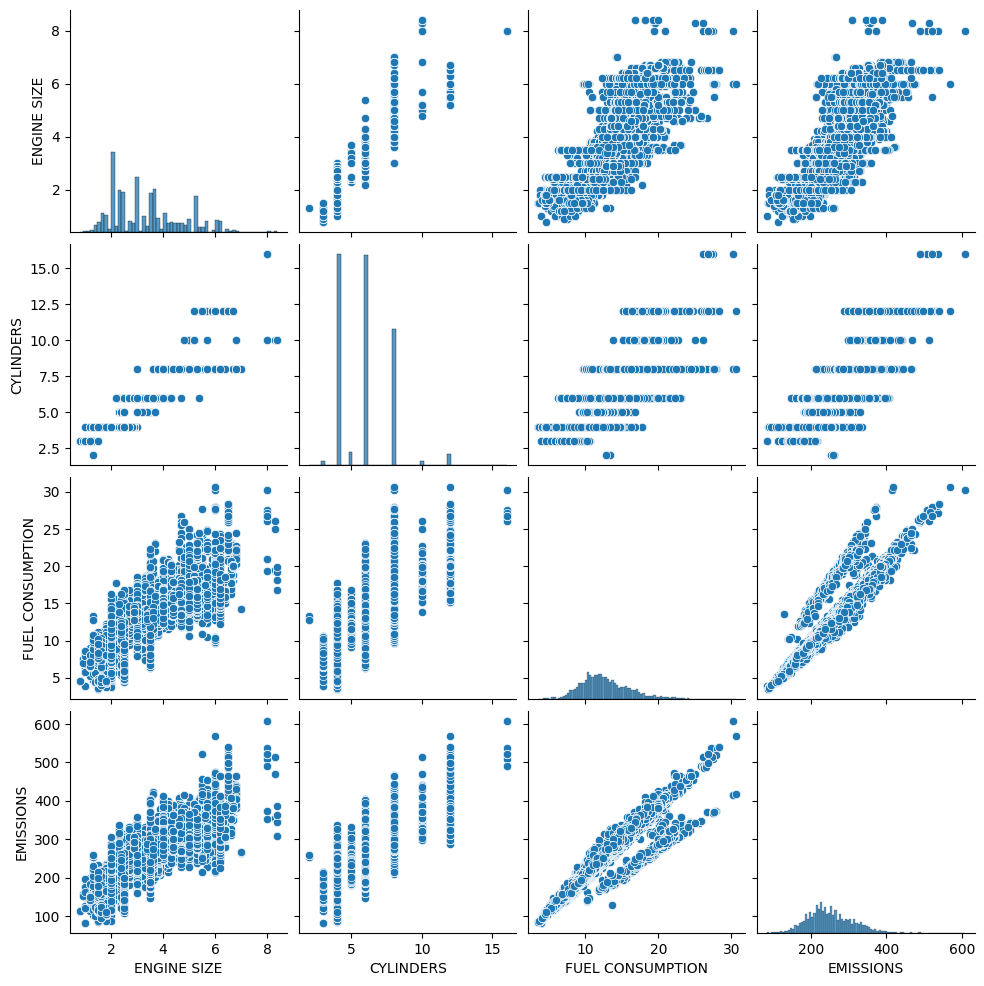

In [34]:
sns.pairplot(df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'EMISSIONS']])


To observe better Cylinder vs Emission

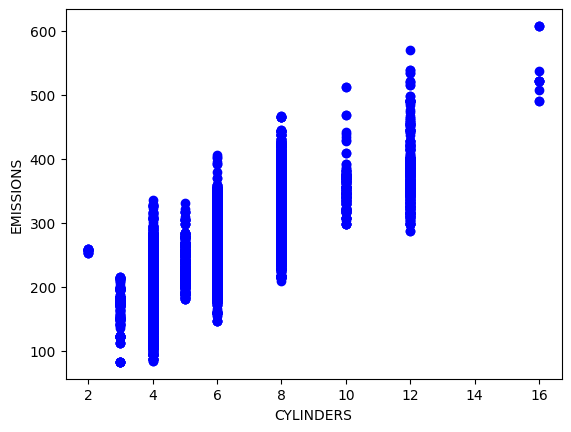

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.EMISSIONS, color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('EMISSIONS')
plt.show()


**Modeling**
**Train/Test Split**
The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm. The procedure involves taking a dataset and dividing it into two subsets.

In [36]:
msk= np.random.rand(len(df))>=0.8
train=cdf[msk]
test=cdf[~msk]

**Fitting**
In regression analysis, curve fitting is the process of specifying the model that provides the best fit to the specific curves in your dataset. Curved relationships between variables are not as straightforward to fit and interpret as linear relationships.

In [39]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINE SIZE']])
train_y=np.asanyarray(train[['EMISSIONS']])
regr.fit(train_x,train_y)

LinearRegression()

**Model Evaluation**
Let's give a description of some of the model statistics;

**Mean Absolute error**
is the measure between the observation and the real value.

**Mean Squared Error**
most commonly used for linear regression, it is a performance evaluation metric.

**R2-score**
is a statistical measure that will show the correlation between the explanatory variables and response variables.



In [42]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(train[['ENGINE SIZE']])
test_y=np.asanyarray(train[['EMISSIONS']])
test_y_ = regr.predict(test_x)
test_x = test_x.reshape(-1, 1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ -test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ -test_y)**2))
print("R2-Score: %.2f" % r2_score(test_y ,test_y_))


Mean absolute error: 25.31
Residual sum of squares (MSE): 1113.24
R2-Score: 0.68
